In [29]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy as sp
import sympy as spy
import scipy.integrate as spi

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [31]:
integrand = lambda w, z, y, x: x + y + z + w

w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

def integrate_w(z, y, x):
    w1, w2 = w_limits(z,y,x)
    return spi.quad(integrand, w1, w2, args=(z, y, x))[0]

def integrate_z(y, x):
    z1,z2 = z_limits(y,x)
    return spi.quad(integrate_w, z1,z2, args=(y, x))[0]

def integrate_y(x):
    y1,y2 = y_limits(x)
    return spi.quad(integrate_z,y1,y2 , args=(x))[0]

result = spi.quad(integrate_y, 0,1)

print(result)
ranges = [
    w_limits,  # Límites para w (dependen de z, y, x)
    z_limits,  # Límites para z (dependen de y, x)
    y_limits,  # Límites para y (dependen de x)
    x_limits   # Límites para x (constantes)
]

#Calculamos el error relativo e==0
spi.nquad(integrand, ranges )[0] - result[0]

(-0.6500971589021813, 1.5813253071872154e-13)


0.0

# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [42]:
# Integral elíptica completa de primer tipo K(k) usando quad
def K(k):
    integral, _ = spi.quad(lambda phi: 1 / np.sqrt(1 - (k**2) * np.sin(phi)**2), 0, np.pi/2)
    return integral

# Integral elíptica completa de segundo tipo E(k) usando quad
def E(k):
    integral, _ = spi.quad(lambda phi: np.sqrt(1 - (k**2) * np.sin(phi)**2), 0, np.pi/2)
    return integral

def A_phi(r, theta, a=1, I=3, mu_0_4pi=1):
    numerador = 4 * a * r * np.sin(theta)
    denominador = a**2 + r**2 + 2 * a * r * np.sin(theta)
    k_squared = numerador / denominador

    # Evitar k^2 >= 1 (divergencia en las integrales) porqué o sino queda un numero negativo en la raíz
    if k_squared >= 1:
        return np.nan  # No definido

    k = np.sqrt(k_squared)
    K_val = K(k)
    E_val = E(k)

    factor = ((2 - k_squared) * K_val - 2 * E_val) / k_squared
    A = mu_0_4pi * (4 * I * a) / np.sqrt(denominador) * factor
    return A


#En este bloque definimos las funciones en terminos de k como K y E las cuales sirven
#Para calcular A, particularmente su componente phi, en las primeras dos funciones no necesitamos k
#porque son integrales con respecto a phi

<ipython-input-37-55a2bb89bc0e>:24: RuntimeWarning: invalid value encountered in scalar divide
  factor = ((2 - k_squared) * K_val - 2 * E_val) / k_squared
<ipython-input-41-710893d93273>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


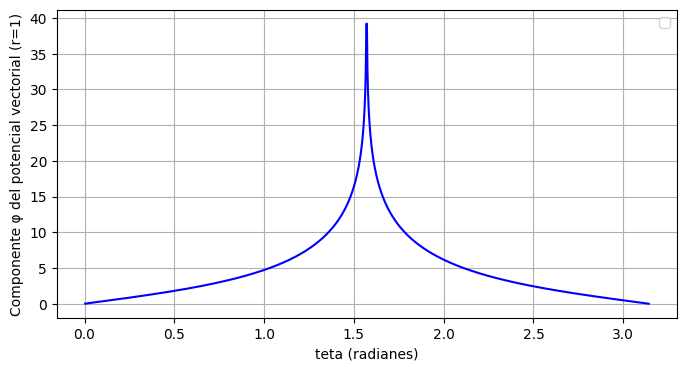

In [41]:
# Valores de teta
theta_values = np.linspace(0, np.pi, 1000)
A_phi_a = [A_phi(r=1, theta=theta) for theta in theta_values]

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(theta_values, A_phi_a, color='blue')
plt.xlabel(r'teta (radianes)')
plt.ylabel(r'Componente phi del potencial (r=1)')
plt.grid(True)
plt.legend()
plt.show()



#En este rectangulo hacemos el caso a) conservando r fijo a una unidad y variando teta de o a pi

<ipython-input-40-034818d15db8>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


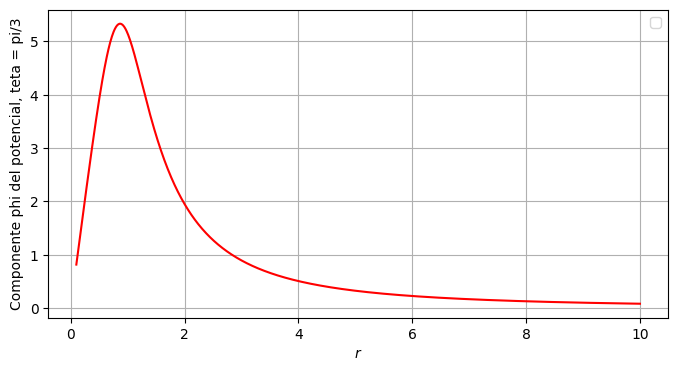

In [40]:
# Valores de r (evitar r=0) porque entonces diverge k
r_values = np.linspace(0.1, 10, 1000)
A_phi_b = [A_phi(r=r, theta=np.pi/3) for r in r_values]

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(r_values, A_phi_b, color='red')
plt.xlabel(r'$r$')
plt.ylabel(r'Componente phi del potencial, teta = pi/3')
plt.grid(True)
plt.legend()
plt.show()
#En este rectangulo hacemos el caso b) conservando teta fijo a una pi/3 y variando r de 0 a 10

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [58]:
def potencia_inversa(A, tol=1e-7, max_iter=1000):
    n = A.shape[0]
    x = np.random.rand(n)  # Vector inicial aleatorio (1)
    x = x / np.linalg.norm(x)  # Normalización inicial

    lambda_hist = []  # Almacena los autovalores aproximados
    lambda_prev = 0

    for k in range(max_iter):
        y = np.linalg.solve(A, x)  # Resuelve Ay = x correspondiente al inciso (2)
        x = y / np.linalg.norm(y)  # Normalización correspondiente al inciso (3)

        # Cociente de Rayleigh para el autovalor mínimo cocrrespondiente al inciso (4)
        lambda_k = np.dot(x.T, np.dot(A, x)) / np.dot(x.T, x)
        lambda_hist.append(lambda_k)

        # Criterio de convergencia
        if np.abs(lambda_k - lambda_prev) < tol: #La tolerancia está definida en los argumento de la función para calcular la potencia inversa
            break
        lambda_prev = lambda_k

    return lambda_k, x, lambda_hist #La función devuelve el autovalor calculado con el coeficiente Rayleigh, el vcetor random normalizado y los autovalores aproximados con cada iteración


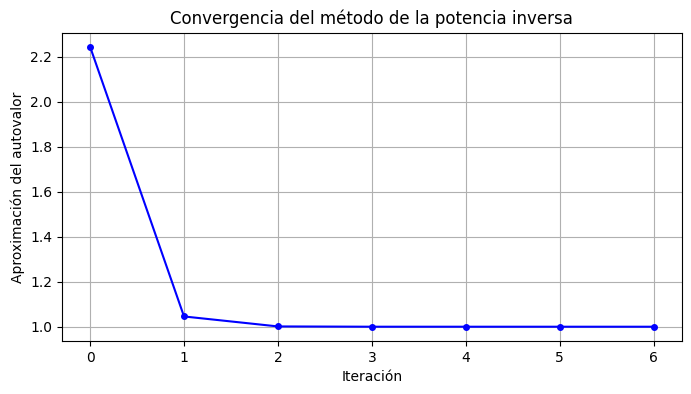

Autovalor mínimo calculado: 1.0000000007611185
Autovector correspondiente: [-0.44720256  0.89443271]


In [59]:
# Definir la matriz A
A = np.array([[5, 2],
              [2, 2]])

# Calcular autovalor mínimo y autovector
lambda_min, v_min, lambda_hist = potencia_inversa(A)

# Gráfico de convergencia para ver su tendencia
plt.figure(figsize=(8, 4))
plt.plot(lambda_hist, 'o-', markersize=4, color='blue')
plt.xlabel('Iteración')
plt.ylabel('Aproximación del autovalor')
plt.title('Convergencia del método de la potencia inversa')
plt.grid(True)
plt.show()

print(f"Autovalor mínimo calculado: {lambda_min}")
print(f"Autovector correspondiente: {v_min}")

In [60]:
# Calcular autovalores y autovectores con numpy
eigenvalues, eigenvectors = np.linalg.eig(A)

# Encontrar el autovalor mínimo y su autovector
idx_min = np.argmin(np.abs(eigenvalues))
lambda_np = eigenvalues[idx_min]
v_np = eigenvectors[:, idx_min]

print(f"Autovalor mínimo (numpy): {lambda_np:.6f}")
print(f"Autovector (numpy): {v_np}")


print(f"diferencia de autovector np con la función implementada: {v_np - v_min} Se puede ver que la diferencia maxima es de 1e-5, un orden de magnitud muy pequeño")

Autovalor mínimo (numpy): 1.000000
Autovector (numpy): [-0.4472136   0.89442719]
diferencia de autovector np con la función implementada: [-1.10353850e-05 -5.51760739e-06] Se puede ver que la diferencia maxima es de 1e-5, un orden de magnitud muy pequeño
